In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [209]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve 


from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Task 1.1 Bag of Word Features

In [6]:
import pandas as pd
import numpy as np

In [132]:
df1 = pd.read_csv("BBCBreaking_task1.csv")
df2 = pd.read_csv("Caradelevingne_task1.csv")
df3 = pd.read_csv("ImRaina_task1.csv")
df4 = pd.read_csv("POTUS_task1.csv")
df5 = pd.read_csv("justinbieber.csv")
df6 = pd.read_csv("shahidkapoor_task1.csv")

In [134]:
# Assigning the labels

df1["Author"] = "BBCBreaking"
df2["Author"] = "Caradelevingne"
df3["Author"] = "ImRaina"
df4["Author"] = "POTUS"
df5["Author"] = "justinbieber"
df6["Author"] = "shahidkapoor"

In [135]:
df1.rename(columns = {'Tweets':'Tweet'}, inplace = True)
df2.rename(columns = {'Tweets':'Tweet'}, inplace = True)
df3.rename(columns = {'Text'  :'Tweet'}, inplace = True)
df4.rename(columns = {'Tweets':'Tweet'}, inplace = True)
df5.rename(columns = {'Tweets':'Tweet'}, inplace = True)
df4.rename(columns = {'Text'  :'Tweet'}, inplace = True)

## Pre Processing

In [136]:
import re

stop_list = []

# stop words taken list from PA # 2

with open("stop_words.txt","r") as f:
  for x in f:
    stop_list.append(x)

for idx, x in enumerate(stop_list):
    stop_list[idx] = re.sub(r"\n", "", stop_list[idx])
    stop_list[idx] = re.sub(r"\'", "", stop_list[idx])

def remove_punctuation(text):
  text = re.sub(r'https?:[a-zA-Z0-9_.+-/#~]+', '', text)
  text = re.sub(r'\w+\b[,.?!-۔؟′″،,؛%\/!@\()°.\-;"\']', "", text)
  
  return text

def lower(s):
  return s.lower()

In [137]:
# Merge DataFrames containing each author's tweets

frames = [df1, df2, df3, df4, df5, df6]
final  = pd.concat(frames,ignore_index = True)
final  = final.drop(["Unnamed: 0"], axis = 1)
tweets = final["Tweet"]

In [138]:
tweets = tweets.apply(lower)

#Remove stop words from tweets

for idx, x in enumerate(tweets):
  l = x.split()
  for i in stop_list:
      if i in l:
        l.remove(i)
        tweets[idx]=" ".join(l)

In [139]:
import string

def remove_punctuation(text):

    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    l    = text.split()
    text = [x for x in l if x]
    text = " ".join(text)
    
    return text
    
def clean_text(series):

  z=re.sub(r'https?:[a-zA-Z0-9_.+-/#~]+','',series)                             # Remove URL's
  z=re.sub(r'[۔؟′″،,؛%\/!@\()°.\-;"\'’]+',"",z)                                   # Remove punctuation
  z=re.sub(r'\d', '', z)                                                        # Remove digits
  z=re.sub(r'[^a-zA-Z ]+', '', z)                                               # Remove extra spaces
  z=re.sub(r' +', ' ', z)
  z=re.sub(r"\s+$", "", z)
  z=re.sub(r"^\s+", "", z)

  return z

tweets = tweets.apply(clean_text)
tweets = tweets.apply(remove_punctuation)

In [140]:
final.loc[:, "Tweet"] = tweets
final["Tweet"] = final['Tweet'].replace('', np.nan).dropna()
final = final.drop_duplicates()                                                 # Drop duplicate tweets
final = final.dropna()                                                          # Drop rows with NaN 

df = final
tweets = df["Tweet"]


In [141]:
# Set labels for authors

author_map = {"BBCBreaking"    : 0,
              "Caradelevingne" : 1,
              "ImRaina"        : 2,
              "POTUS"          : 3,
              "justinbieber"   : 4,
              "shahidkapoor"   : 5}

df = df.replace({"Author": author_map})

labels = df["Author"]
tweets = df["Tweet"]

In [142]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test set. Note that we have used stratified sampling.
X_train, X_test, y_train, y_test = train_test_split(tweets, labels , test_size=0.1, stratify = labels, random_state = 20200226)

In [143]:
# This function returns the vocabulary in a set of tweets
def create_vocabulary(X):
  vocabulary = []

  for tweet in X:
    l=tweet.split(" ")
    
    for word in l:
      if word not in vocabulary:
        vocabulary.append(word)

  return vocabulary

vocabulary = create_vocabulary(X_train)

In [144]:
print("Number of tokens in vocabulary = ", len(vocabulary))

Number of tokens in vocabulary =  10073


In [145]:
# Create Bag of Words representations for the train and test tweets

def create_bow(X,vocabulary):

  def get_count(tweet,vocab):

    global_count=[]
    for x in vocab:
      l = tweet.split(" ")
      c = l.count(x)
      c+=1                          # Add 1 smoothing
      global_count.append(c)
    
    return global_count

  bag_words=[]
  for tweet in X:
    c = get_count(tweet, vocabulary)
    bag_words.append(c)
  
  return bag_words

bag_words_train = create_bow(X_train, vocabulary)       # Bag of Words of Train set
bag_words_test  = create_bow(X_test, vocabulary)        # Bag of Words of Test set

In [146]:
# Now we add the features to a dataframe and save them as a csv file for train and test for BoW Features

df_train = pd.DataFrame({"Tweet"        : X_train, 
                         "bag_of_words" : bag_words_train, 
                         "Author"       : y_train}, index=None)

df_test  = pd.DataFrame({"Tweet"        : X_test, 
                         "bag_of_words" : bag_words_test,
                         "Author"       : y_test} , index=None)

df_train = df_train.reset_index(drop = True)
df_test  = df_test.reset_index(drop  = True)

In [147]:
print ('Total # of features in Train set = ', len(bag_words_train))

Total # of features in Train set =  4730


In [150]:
df_train.to_json("train_BoW.json")      # Save train set with BoW as json file
df_test.to_json("test_BoW.json")        # Save test set with BoW as json file

# Task 1.2 Embeddings

In [65]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 5.8 MB 16.7 MB/s 
     |████████████████████████████████| 1.3 MB 62.6 MB/s 
     |████████████████████████████████| 182 kB 66.7 MB/s 
     |████████████████████████████████| 7.6 MB 44.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=3d368240c0e689f2f2a8a4f1530508fd6e215330e977c95a3682bfd868e73ddb
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [66]:
#creating embeddings for train and test data

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [237]:
labels = df["Author"]
tweets = df["Tweet"]

In [238]:
tweets_embeddings = tweets.apply(model.encode)

In [239]:
# Now we add the embeddings features to a dataframe and save them as a csv file for train and test

df = pd.DataFrame({"Tweet"        : tweets, 
                   "embeddings"   : tweets_embeddings,
                   "Author"       : labels}, index=None)

In [240]:
labels = df["Author"]
tweets = df["Tweet"]

In [241]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test set. Note that we have used stratified sampling.
train, test = train_test_split(df, test_size = 0.1, stratify = df['Author'], random_state = 20200226)

In [242]:
train = train.reset_index(drop = True)
test  = test.reset_index(drop  = True)

In [243]:
train.to_json("train_embeddings.json")    # Save train set with embeddings as json file
test.to_json("test_embeddings.json")      # Save test set with embeddings as json file

# Task 2 - KNN

### Bag of Words Features

In [234]:
train_df  = pd.read_json("train_BoW.json")
test_df   = pd.read_json("test_BoW.json")

X_train   = train_df.iloc[:, 1].values
y_train   = train_df.iloc[:, 2].values

X_test    = test_df.iloc[:, 1].values
y_test    = test_df.iloc[:, 2].values


# Converting the X_train values from array containing lists -> array of arrays
temp = []
for i in X_test:
    temp.append(np.array(i))

temp = np.array(temp)
X_test = temp

temp = []
for i in X_train:
    temp.append(np.array(i))

temp = np.array(temp)
X_train = temp

In [252]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# The training and validation are computed using validation_curve function below.
# It returns train, validation scores for values of k where k = 1 .... 5

train_scores, val_scores = validation_curve(KNeighborsClassifier(),
                                            X_train,
                                            y_train,
                                            cv = 5,
                                            scoring = "accuracy",
                                            param_range = range(1,6),
                                            param_name = "n_neighbors")

# Take the mean score for each value of K
train_mean = np.mean(train_scores, axis = 1)
val_mean   = np.mean(val_scores, axis = 1)


a_list          = []      # this list is used to keep track of optimal value of k

for var in range(1, 6):

  print("k = ", var)

  knn        = KNeighborsClassifier(var)
  accuracy_s = cross_val_score(knn, X_train, y_train, cv = 5)                   # compute cross-validation score on train-set

  val_loss      = accuracy_s
  mean_val_loss = sum(val_loss)/len(val_loss)                                   # compute average of validation loss

  print("Mean Validation Loss", mean_val_loss, '\n')                            # Print mean validation loss

  a_list.append(mean(accuracy_s))                                               # add the validation scores to a_list

copy = a_list
copy = sorted(copy)
a    = copy[-1]

optimal_k = a_list.index(a) + 1                                                 # returns optimal value of k

neigh = KNeighborsClassifier(optimal_k)                                         # fit on the train set using the optimal value of k
neigh.fit(X_train, y_train)

k =  1
Mean Validation Loss =  0.46300098788921007 

k =  2
Mean Validation Loss =  0.4837712975497908 

k =  3
Mean Validation Loss =  0.4831063627382825 

k =  4
Mean Validation Loss =  0.4468737575158855 

k =  5
Mean Validation Loss =  0.43384508433646773 

KNeighborsClassifier(n_neighbors=2)


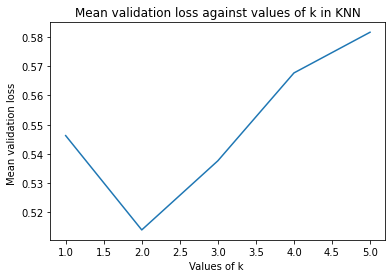

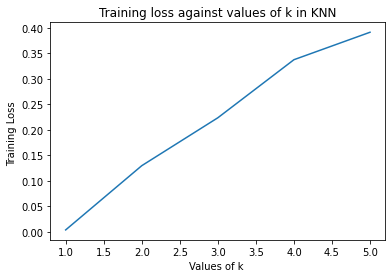

In [ ]:
plt.figure()

r = range(1, 6)

plt.plot(r, 1 - val_mean)
plt.xlabel("Values of k ")
plt.ylabel("Mean validation loss")
plt.title("Mean validation loss against values of k in KNN")
plt.show()

plt.figure()
plt.plot(r, 1 - train_mean)
plt.xlabel("Values of k ")
plt.ylabel("Training Loss ")
plt.title("Training loss against values of k in KNN")

plt.show()

As seen in the plot above for the mean validation loss, we can observe that the loss is lowest for the value of `k = 2`. This is the optimal value of k which we have used to fit the knn model report the results on the test data.

Macro Avg Precision = 68 %
Macro Avg Recall    = 55 %
Macro Avg F1-score  = 55 % 

Accuracy Score      = 55 % 

Confusion Matrix - Test Set :


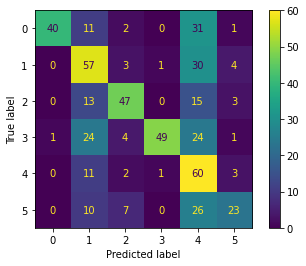

In [220]:
y_test_pred = knn.predict(X_test)

report = classification_report(y_test, y_test_pred, output_dict=True)['macro avg']

macro_avg_precision =  int(report['precision'] * 100)
macro_avg_recall    =  int(report['recall'] * 100)
macro_f1_score      =  int(report['f1-score'] * 100)

accuracy            =  int(accuracy_score(y_test, y_test_pred) * 100)

print (f'Macro Avg Precision = {macro_avg_precision} %')
print (f'Macro Avg Recall    = {macro_avg_recall} %')
print (f'Macro Avg F1-score  = {macro_f1_score} %', '\n')

print (f'Accuracy Score      = {accuracy} % \n')

cm = confusion_matrix(y_test, y_test_pred)

print ('Confusion Matrix - Test Set :')
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Word Embedding Features

In [244]:
train_df  = pd.read_json("train_embeddings.json")
test_df   = pd.read_json("test_embeddings.json")

X_train   = train_df.iloc[:, 1].values
y_train   = train_df.iloc[:, 2].values

X_test    = test_df.iloc[:, 1].values
y_test    = test_df.iloc[:, 2].values

temp = []
for i in X_test:
    temp.append(np.array(i))

temp = np.array(temp)
X_test = temp

temp = []
for i in X_train:
    temp.append(np.array(i))

temp = np.array(temp)
X_train = temp

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

lowest_loss  = 100
val_losses   = []
train_losses = []


# The training and validation are computed using validation_curve function below.
# It returns train, validation scores for values of k where k = 1 .... 5

train_scores, val_scores = validation_curve(KNeighborsClassifier(),
                                           X_train,
                                           y_train,
                                           cv = 5,
                                           scoring = "accuracy",
                                           param_range = range(1, 6),
                                           param_name = "n_neighbors")

# Take the mean score for each value of K
train_mean = np.mean(train_scores,axis=1)
val_mean   = np.mean(val_scores,axis=1)

for k in range(1,6):

  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)

  cv_scores  = cross_val_score(knn, X_train, y_train, cv = 5)
  train_loss = (1 - cv_scores).mean()

  train_losses.append(train_loss)

  if train_loss < lowest_loss:
    lowest_loss = train_loss
    optimal_k   = k

  print (f'K = {k}')
  print (f'Mean Validation Loss = {train_loss} \n')
  
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train, y_train)

K = 1
Mean Validation Loss = 0.18498942917547567 

K = 2
Mean Validation Loss = 0.18837209302325583 

K = 3
Mean Validation Loss = 0.18012684989429179 

K = 4
Mean Validation Loss = 0.1778012684989429 

K = 5
Mean Validation Loss = 0.17843551797040172 



KNeighborsClassifier(n_neighbors=4)

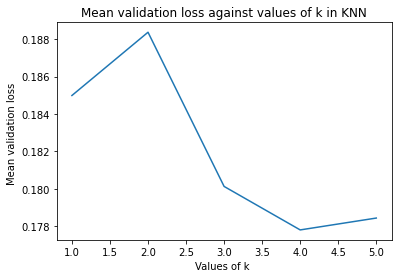

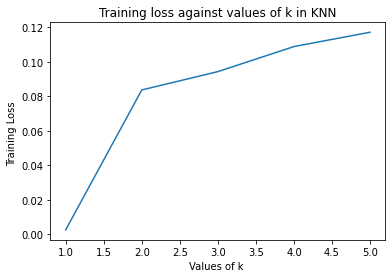

In [ ]:
plt.figure()
r = range(1,6)

plt.plot(r, 1 - val_mean)
plt.xlabel("Values of k ")
plt.ylabel("Mean validation loss ")
plt.title("Mean validation loss against values of k in KNN")
plt.show()

plt.figure()
plt.plot(r, 1 - train_mean)
plt.xlabel("Values of k ")
plt.ylabel("Training Loss ")
plt.title("Training loss against values of k in KNN")

plt.show()

As seen in the plot above for the mean validation loss, we can observe that the loss is lowest for the value of `k = 4`. This is the optimal value of k which we have used to fit the knn model report the results on the test data.

Macro Avg Precision = 84 %
Macro Avg Recall    = 82 %
Macro Avg F1-score  = 82 % 

Accuracy Score      = 84 % 

Confusion Matrix - Test Set :


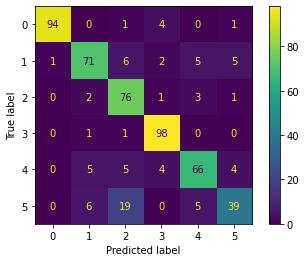

In [ ]:
y_test_pred = knn.predict(X_test)

report = classification_report(y_test, y_test_pred, output_dict=True)['macro avg']

macro_avg_precision =  int(report['precision'] * 100)
macro_avg_recall    =  int(report['recall'] * 100)
macro_f1_score      =  int(report['f1-score'] * 100)

accuracy            =  int(accuracy_score(y_test, y_test_pred) * 100)

print (f'Macro Avg Precision = {macro_avg_precision} %')
print (f'Macro Avg Recall    = {macro_avg_recall} %')
print (f'Macro Avg F1-score  = {macro_f1_score} %', '\n')

print (f'Accuracy Score      = {accuracy} % \n')

print ('Confusion Matrix - Test Set :')
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Task 3 - NN's

### Bag of Words Features

In [246]:
train_df  = pd.read_json("train_BoW.json")
test_df   = pd.read_json("test_BoW.json")

X_train   = train_df.iloc[:, 1].values
y_train   = train_df.iloc[:, 2].values

X_test    = test_df.iloc[:, 1].values
y_test    = test_df.iloc[:, 2].values

temp = []
for i in X_test:
    temp.append(np.array(i))

temp = np.array(temp)
X_test = temp

temp = []
for i in X_train:
    temp.append(np.array(i))

temp = np.array(temp)
X_train = temp

In [258]:
mlp = MLPClassifier(alpha = 0.1,
                    solver   = 'adam',
                    activation = 'relu',
                    hidden_layer_sizes = (1000),
                    learning_rate = 'invscaling')

cv_scores  = cross_val_score(mlp, X_train, y_train, cv = 5)
print (cv_scores)

[0.404342556 0.414522126 0.398436293 0.418397153 0.404345128]


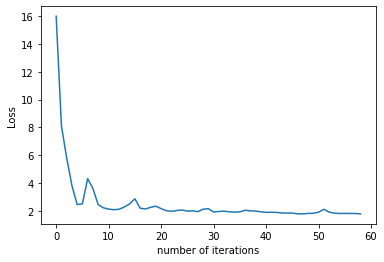

In [ ]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

plt.plot(mlp.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.show()

Macro Avg Precision = 36 %
Macro Avg Recall    = 37 %
Macro Avg F1-score  = 30 % 

Accuracy Score      = 41 % 

Confusion Matrix - Test Set :


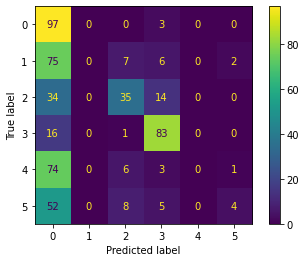

In [ ]:
y_test_pred = mlp.predict(X_test)

report = classification_report(y_test, y_test_pred, output_dict = True)['macro avg']

macro_avg_precision =  int(report['precision'] * 100)
macro_avg_recall    =  int(report['recall'] * 100)
macro_f1_score      =  int(report['f1-score'] * 100)

accuracy            =  int(accuracy_score(y_test, y_test_pred) * 100)

print (f'Macro Avg Precision = {macro_avg_precision} %')
print (f'Macro Avg Recall    = {macro_avg_recall} %')
print (f'Macro Avg F1-score  = {macro_f1_score} %', '\n')

print (f'Accuracy Score      = {accuracy} % \n')

print ('Confusion Matrix - Test Set :')
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Word Embeddings

In [ ]:
train_df  = pd.read_json("train_embeddings.json")
test_df   = pd.read_json("test_embeddings.json")

X_train   = train_df.iloc[:, 1].values
y_train   = train_df.iloc[:, 2].values

X_test    = test_df.iloc[:, 1].values
y_test    = test_df.iloc[:, 2].values

temp = []
for i in X_test:
    temp.append(np.array(i))

temp = np.array(temp)
X_test = temp

temp = []
for i in X_train:
    temp.append(np.array(i))

temp = np.array(temp)
X_train = temp

In [ ]:
mlp = MLPClassifier(max_iter = 4000,
                    solver   = 'adam',
                    momentum = 0.9,
                    nesterovs_momentum = True,
                    learning_rate_init = 0.01,
                    hidden_layer_sizes =(2000))

cv_scores  = cross_val_score(mlp, X_train, y_train, cv = 5)
print (cv_scores)

[0.80972516 0.82135307 0.81606765 0.82029598 0.81395349]


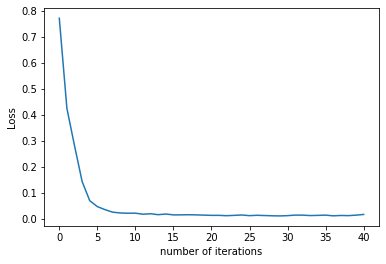

In [ ]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

plt.plot(mlp.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('number of iterations')
plt.show()

Macro Avg Precision = 80 %
Macro Avg Recall    = 79 %
Macro Avg F1-score  = 80 % 

Accuracy Score      = 81 % 

Confusion Matrix - Test Set :


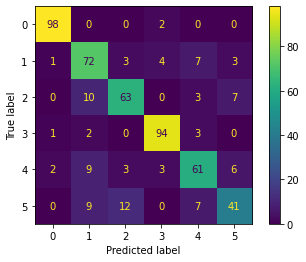

In [ ]:
y_test_pred = mlp.predict(X_test)

report = classification_report(y_test, y_test_pred, output_dict=True)['macro avg']

macro_avg_precision =  int(report['precision'] * 100)
macro_avg_recall    =  int(report['recall'] * 100)
macro_f1_score      =  int(report['f1-score'] * 100)

accuracy            =  int(accuracy_score(y_test, y_test_pred) * 100)

print (f'Macro Avg Precision = {macro_avg_precision} %')
print (f'Macro Avg Recall    = {macro_avg_recall} %')
print (f'Macro Avg F1-score  = {macro_f1_score} %', '\n')

print (f'Accuracy Score      = {accuracy} % \n')

print ('Confusion Matrix - Test Set :')
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Task 4 - Ensemble Methods

### Bag of Words Features

In [ ]:
train_df  = pd.read_json("train_BoW.json")
test_df   = pd.read_json("test_BoW.json")

X_train   = train_df.iloc[:, 1].values
y_train   = train_df.iloc[:, 2].values

X_test    = test_df.iloc[:, 1].values
y_test    = test_df.iloc[:, 2].values

temp = []
for i in X_test:
    temp.append(np.array(i))

temp = np.array(temp)
X_test = temp

temp = []
for i in X_train:
    temp.append(np.array(i))

temp = np.array(temp)
X_train = temp

In [ ]:
#######################################

#           Random Forest

######################################

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42, 
                               n_estimators = 110, 
                               bootstrap = False, 
                               criterion = 'entropy', 
                               max_depth = None, 
                               max_features = 1, 
                               min_samples_leaf = 1, 
                               min_samples_split = 10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=1,
                       min_samples_split=10, n_estimators=110, random_state=42)

Macro Avg Precision = 85 %
Macro Avg Recall    = 84 %
Macro Avg F1-score  = 84 % 

Accuracy Score      = 85 % 

Confusion Matrix :


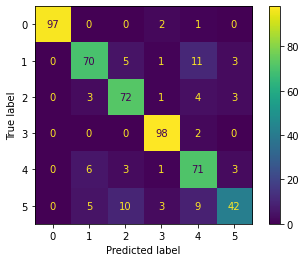

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_pred = model.predict(X_test)

report = classification_report(y_test, y_test_pred, output_dict=True)['macro avg']

macro_avg_precision =  int(report['precision'] * 100)
macro_avg_recall    =  int(report['recall'] * 100)
macro_f1_score      =  int(report['f1-score'] * 100)

accuracy            =  int(accuracy_score(y_test, y_test_pred) * 100)

print (f'Macro Avg Precision = {macro_avg_precision} %')
print (f'Macro Avg Recall    = {macro_avg_recall} %')
print (f'Macro Avg F1-score  = {macro_f1_score} %', '\n')

print (f'Accuracy Score      = {accuracy} % \n')

print ('Confusion Matrix :')
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Word Embeddings

In [ ]:
train_df  = pd.read_json("train_embeddings.json")
test_df   = pd.read_json("test_embeddings.json")

X_train   = train_df.iloc[:, 1].values
y_train   = train_df.iloc[:, 2].values

X_test    = test_df.iloc[:, 1].values
y_test    = test_df.iloc[:, 2].values

temp = []
for i in X_test:
    temp.append(np.array(i))

temp = np.array(temp)
X_test = temp

temp = []
for i in X_train:
    temp.append(np.array(i))

temp = np.array(temp)
X_train = temp

In [ ]:
#######################################

#           Voting Classifier

######################################

log_clf = LogisticRegression(solver = "liblinear", random_state = 42)

rnd_clf = RandomForestClassifier(n_estimators = 10, 
                                 random_state = 42,
                                 bootstrap = False,
                                 criterion = 'entropy',
                                 max_depth = None,
                                 max_features = 10,
                                 min_samples_leaf = 3,
                                 min_samples_split = 10)

gb_model = GradientBoostingClassifier()

voting_clf = VotingClassifier(estimators = [
          ('lr', log_clf),
          ('dt', rnd_clf),
          ('gb', gb_model)], voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, gb_model, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7908745247148289
RandomForestClassifier 0.6387832699619772
GradientBoostingClassifier 0.7870722433460076
VotingClassifier 0.7832699619771863


Macro Avg Precision = 78 %
Macro Avg Recall    = 76 %
Macro Avg F1-score  = 76 % 

Accuracy Score      = 78 % 

Confusion Matrix :


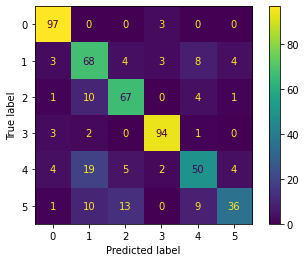

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_pred = voting_clf.predict(X_test)

report = classification_report(y_test, y_test_pred, output_dict=True)['macro avg']

macro_avg_precision =  int(report['precision'] * 100)
macro_avg_recall    =  int(report['recall'] * 100)
macro_f1_score      =  int(report['f1-score'] * 100)

accuracy            =  int(accuracy_score(y_test, y_test_pred) * 100)

print (f'Macro Avg Precision = {macro_avg_precision} %')
print (f'Macro Avg Recall    = {macro_avg_recall} %')
print (f'Macro Avg F1-score  = {macro_f1_score} %', '\n')

print (f'Accuracy Score      = {accuracy} % \n')

print ('Confusion Matrix :')
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Task 5

Q1: Which model performed best and why do you think that is?

`Answer:` 
The Random Forest Classifier performed best overall from among all classifiers across both features of BoW and word embeddings. It is less prone to overfitting compared to other models. Since Bag of Words is a high dimensional dataset therefore it is suitable for a Random Forest Classifier.

Q2: Which features gave better results for each model? Explain.

`Answer:` 

For both K-Nearest Neighbors and Neural Networks, word embeddings gave a higher accuracy compared to for Bag of Words features. This is because the BoW representation does not capture the relationships between words.
On the other hand, transformer word embeddings are a type of word representation that captures the relationships between words in a text. These representations can be more effective because they capture more information about the meaning of the words in the text. 

While for Ensemble methods i.e. the Random Forest classifier give a higher accuracy for the bag of words features. This is because BoW features are suitable for this classifier. Since the features are high dimensional and are difficult to interpret for the other models. While the Random Forest classifier is faster because we are working only on a subset of features, so we can easily work with hundreds of features.


Q3: What effect would increasing the classes to 150 have?

`Answer:` 

The accuracy of models will reduce as the amount of data we have per class is same. More number of classes with similar quantities of data leads to greater overlap between classes leading to lower accuracy for most of models. In summary the likely-hood of a text being classified as part of multiple classes leads to a random decisions being made between the overlapping classes leading to reduced accuracy.

As the number of classes increases, the probability of predicting the right class also decreases. For example, to predict between two classes, a random guess would have a probability of 0.5, however, increasing the classes to 3 or more, this number would decrease to 0.3 or below. Therefore, increasing the number of classes would decrease the accuracies of the models.

Q4: Suggest improvements to text preparation, feature extraction, and models that can be made to perform this task better

`Answer:`

In text preparation, an improvement would be to keep the emojis. In today’s world, people use a lot of emojis and have a tendency to use the same emoji over and over again to express emotions. This marker can be helpful in identifying authorship. 
In Neural Networks (NN), more hidden layers could be added to make the model more efficient. Moreover, a grid search can be run on NN with different parameters to select the parameters that give the highest accuracy.

Q5: What - in your understanding - are the applications of authorship attribution?

`Answer:`

The problem of authorship attribution is one of the most exciting research areas in the field of Natural Language processing and pattern recognition. This problem holds high importance in the fields of psychology, forensics analysis, examination of documents, checking fraudulent messages, online text/tweet attribution verification, etc. Aside from the underlying moral and ethical concerns, accurately listing authors enables scientists and readers to understand the proper credit for the publication to a particular author.
In forensic text/tweets analysis, this technique helps to analyze, compare and evaluate the writing characteristics to determine if the writing was or was not prepared by the known writer.